# Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

# Loading data

In [2]:
df = pd.read_csv('../data/spam.csv',encoding='Windows-1252')

In [3]:
df.shape

(5572, 5)

- Our dataset contains 5572 observation and 5 characterisitics (which one is dependant variable, and rest 4 are independant variables)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


- Most of the data in columns 2,3 and 4 are null values (they can be dropped)

In [5]:
df.sample(10,random_state=123456)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1007,ham,I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?,NaN,NaN,NaN
166,spam,URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only,NaN,NaN,NaN
2256,ham,"Just checked out, heading out to drop off my stuff now",NaN,NaN,NaN
3862,spam,"Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg å£1.50",NaN,NaN,NaN
4780,ham,Yup... Hey then one day on fri we can ask miwa and jiayin take leave go karaoke,NaN,NaN,NaN
5439,ham,Hey i've booked the 2 lessons on sun liao...,NaN,NaN,NaN
4374,spam,Ur TONEXS subscription has been renewed and you have been charged å£4.50. You can choose 10 more polys this month. www.clubzed.co.uk *BILLING MSG*,NaN,NaN,NaN
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å£500 Cash or å£100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary",NaN,NaN,NaN
1043,ham,Mmm thats better now i got a roast down me! iåÕd b better if i had a few drinks down me 2! Good indian?,NaN,NaN,NaN
3342,ham,"I haven't forgotten you, i might have a couple bucks to send you tomorrow, k? I love ya too",NaN,NaN,NaN


- We will be dropping columns 2,3 and 4 since they are not significative to our problem.

In [6]:
for column in ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']:
    del df[column]
df.sample(10,random_state=123456)

,v1,v2
1007,ham,I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?
166,spam,URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only
2256,ham,"Just checked out, heading out to drop off my stuff now"
3862,spam,"Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg å£1.50"
4780,ham,Yup... Hey then one day on fri we can ask miwa and jiayin take leave go karaoke
5439,ham,Hey i've booked the 2 lessons on sun liao...
4374,spam,Ur TONEXS subscription has been renewed and you have been charged å£4.50. You can choose 10 more polys this month. www.clubzed.co.uk *BILLING MSG*
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å£500 Cash or å£100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary"
1043,ham,Mmm thats better now i got a roast down me! iåÕd b better if i had a few drinks down me 2! Good indian?
3342,ham,"I haven't forgotten you, i might have a couple bucks to send you tomorrow, k? I love ya too"


- We will rename the columns to make them more significative

In [7]:
df.columns = ['target', 'message']

In [8]:
df.sample(10,random_state=123456)

,target,message
1007,ham,I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?
166,spam,URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only
2256,ham,"Just checked out, heading out to drop off my stuff now"
3862,spam,"Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg å£1.50"
4780,ham,Yup... Hey then one day on fri we can ask miwa and jiayin take leave go karaoke
5439,ham,Hey i've booked the 2 lessons on sun liao...
4374,spam,Ur TONEXS subscription has been renewed and you have been charged å£4.50. You can choose 10 more polys this month. www.clubzed.co.uk *BILLING MSG*
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å£500 Cash or å£100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary"
1043,ham,Mmm thats better now i got a roast down me! iåÕd b better if i had a few drinks down me 2! Good indian?
3342,ham,"I haven't forgotten you, i might have a couple bucks to send you tomorrow, k? I love ya too"


- The dataset consists of 5572 English messages, each entry is designated as being ham or spam. Dataframe has two columns: 
 - The first column `target` indicating the class of message as ham or spam.
 - The second column `message` is the content of the message.

In [9]:
df.groupby('target').describe()

message         \
         count unique   
target                  
ham       4825   4516   
spam       747    653   

                                                                                                                                                               \
                                                                                                                                                          top   
target                                                                                                                                                          
ham                                                                                                                                    Sorry, I'll call later   
spam    Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!   

             
       freq  
target       
ham      30  
spam      4

- Our dataset contains 4516 unique (out of 4825 message) `ham` messages and 653 unique (out of 747 message) `spam` ones.
- `Sorry, I'll call later` is the most common `ham` message.
- `Please call our customer service representative on FREEPHONE...` is the most common `spam` message.


# Feature engineering

- We will be adding two new columns containing the number of words (`word_count`) and sentences (`sentence_count`) in each message.

In [10]:
import nltk
from nltk.tokenize import sent_tokenize
import string
def tokenize_words(message):
    # remove punctuation
    message = message.translate(str.maketrans('', '', string.punctuation))
    return nltk.word_tokenize(message)
def tokenize_sentences(message):
    return sent_tokenize(message)

In [11]:
df['word_count'] = df['message'].apply(lambda message : len(tokenize_words(message)))
df['sentence_count'] = df['message'].apply(lambda message : len(tokenize_sentences(message)))
df.sample(10,random_state=123456)

,target,message,word_count,sentence_count
1007,ham,I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?,30,3
166,spam,URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only,27,6
2256,ham,"Just checked out, heading out to drop off my stuff now",11,1
3862,spam,"Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg å£1.50",22,3
4780,ham,Yup... Hey then one day on fri we can ask miwa and jiayin take leave go karaoke,17,1
5439,ham,Hey i've booked the 2 lessons on sun liao...,9,1
4374,spam,Ur TONEXS subscription has been renewed and you have been charged å£4.50. You can choose 10 more polys this month. www.clubzed.co.uk *BILLING MSG*,23,3
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å£500 Cash or å£100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary",28,2
1043,ham,Mmm thats better now i got a roast down me! iåÕd b better if i had a few drinks down me 2! Good indian?,24,3
3342,ham,"I haven't forgotten you, i might have a couple bucks to send you tomorrow, k? I love ya too",19,2


# EDA (Exploratory data analysis)

In [12]:
df.describe()

,word_count,sentence_count
count,5572.000000,5572.000000
mean,15.296482,1.991565
std,11.089235,1.501427
min,0.000000,1.000000
25%,7.000000,1.000000
50%,12.000000,1.500000
75%,22.000000,2.000000
max,171.000000,38.000000


- The average number of words is (`mean`) 15 word
- The average number of sentences is (`mean`) 2 sentences
- The mean values are close to medians
- There's a large difference  between the 75% and max value (there might be outliers in the dataset)

In [13]:
df.loc[df['word_count'] == df['word_count'].max()]

,target,message,word_count,sentence_count
1084,ham,For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..,171,1


- The longest message contains 171 (`max`) word

In [14]:
df.loc[df['word_count'] < 2].sort_values('word_count').head(5)

,target,message,word_count,sentence_count
3374,ham,:),0,1
4822,ham,:-) :-),0,1
260,ham,Yup,1,1
3092,ham,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323,1,1
3154,ham,Ok...,1,1


- The shortest message contains either 1 word or emojis only (counted as 0 words)

## Detecting outliers using the 1.5 IQR (Interquartile Rule)

### Applying the 1.5 IQ rule to `word_count`
- IQR = Q3-Q1 = 16 | Q1 = 7 | Q3 = 23
- IQR * 1.5 = 24
- IQR * 1.5 - Q1 = 17
- Q3 + IQR * 1.5 = 47

In [15]:
wc_desc = df.describe()['word_count']
wc_Q1, wc_Q3 = wc_desc['25%'], wc_desc['75%']
IQR = wc_Q3 - wc_Q1
low, high = IQR * 1.5 - wc_Q1 , wc_Q3 + IQR * 1.5
print(f'Low outliers count : {len(df[df.word_count<low])}\nHigh outliers count : {len(df[df.word_count>high])}')

Low outliers count : 3362
High outliers count : 79


- Removing low outliers will result in removing more than **half** of the data, while high outliers count is low so it will not affect our data.

### Applying the 1.5 IQ rule to `sentence_count`
- IQR = Q3-Q1 = 16 | Q1 = 7 | Q3 = 23
- IQR * 1.5 = 24
- IQR * 1.5 - Q1 = 17
- Q3 + IQR * 1.5 = 47

In [16]:
wc_desc = df.describe()['sentence_count']
wc_Q1, wc_Q3 = wc_desc['25%'], wc_desc['75%']
IQR = wc_Q3 - wc_Q1
low, high = IQR * 1.5 - wc_Q1 , wc_Q3 + IQR * 1.5
print(f'Low outliers count : {len(df[df.sentence_count<low])}\nHigh outliers count : {len(df[df.sentence_count>high])}')

Low outliers count : 0
High outliers count : 662


- There are no lower outliers in the dataset, while there're 662 high outliers. Like `word_count`, high outliers count is low so they will not affect the data.

In [17]:
fig = px.scatter_matrix(df,
                        dimensions=["word_count", "sentence_count"],
                        color="target")
fig.show()

## Count of every class

In [18]:
labels = ['ham', 'spam']
df.groupby('target')['target'].agg('count')

target
ham     4825
spam     747
Name: target, dtype: int64

In [19]:
counts = df.groupby('target').count().reset_index()
counts = counts.rename(columns = {"message":"count"})
fig = px.bar(counts,
             x='target',
             y='count',
             color='target',
             width = 500, height=400)
fig.update_layout(title_text='Count of ham and spam messages in the dataset',
                  xaxis_title_text='Class',
                  yaxis_title_text='Count')
fig.show()

- As we can see, the classes are imbalanced.

## Word count distribution

In [20]:
fig_hist = px.histogram(df,
                        x="word_count",
                        color="target",
                        barmode="overlay",
                        marginal="violin", #box or rug
                        hover_data=df.columns,
                        range_x=["0","100"],
                        width=700)
fig_hist.update_layout(title_text='Message length distribution (Word count)',
                       xaxis_title_text='Word Count',
                       bargap=0.3)
fig_hist.show()

- As we can see, `ham` message lenght tends to be lower than `spam` message lenght.

## Sentence count distribution

In [21]:
fig_hist = px.histogram(df,
                        x="sentence_count",
                        color="target",
                        barmode="overlay",
                        marginal="violin", #box or rug
                        hover_data=df.columns,
                        range_x=["0","40"],
                        width=700)
fig_hist.update_layout(title_text='Message length distribution (Sentence count)',
                       xaxis_title_text='Sentence Count',
                       bargap=0.3)
fig_hist.show()

## Data pre-processing

#### Make text lowercase, remove links, text in brackets, punctuation, words containing numbers

In [22]:
import re
def clean_text(message):
    # Convert to lowercase
    message = message.lower()
    # Replace text between brackets with 'bracketstext' (spam messages)
    message = re.sub('<.*?>+', ' bracketstext ', message)
    # Remove å character (always added to currency symbol due to encoding)
    message = re.sub(r'å','',message)
    # Replace money amounts ($123 or 1£) with 'moneytext'
    message = re.sub(r'[$|£|€]\d+', ' moneytext ', message)
    message = re.sub(r'\d+[$|£|€]', ' moneytext ', message)
    # Replace remaining currency symbols with 'currsymb'
    message = re.sub(r'[$|£|€]', ' currsymb ', message)
    # Replace links with 'weblink'
    link_regex = r'(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)'
    link_regex1 = r'https?://\S+|www\.\S+'
    message = re.sub(link_regex1, ' weblink ', message)
    # Replace phone numbers with 'phonenumber'
    message = re.sub(r'\d{5,}', ' phonenumber ', message)
    # TODO :Replace emojis with their code
    # Remove extra whitespaces
    message = re.sub(r'\s+', ' ', message)
    # Remove punctuation
    message = message.translate(str.maketrans('', '', string.punctuation))
    return message

In [23]:
df['message_clean'] = df.message.apply(clean_text)
df.sample(10,random_state=123456)

,target,message,word_count,sentence_count,message_clean
1007,ham,I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?,30,3,i dont quite know what to do i still cant get hold of anyone i cud pick you up bout 730pm and we can see if theyre in the pub
166,spam,URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only,27,6,urgent we are trying to contact you last weekends draw shows that you have won a moneytext prize guaranteed call phonenumber claim code s89 valid 12hrs only
2256,ham,"Just checked out, heading out to drop off my stuff now",11,1,just checked out heading out to drop off my stuff now
3862,spam,"Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg å£1.50",22,3,oh my god ive found your number again im so glad text me back xafter this msgs cst std ntwk chg moneytext 50
4780,ham,Yup... Hey then one day on fri we can ask miwa and jiayin take leave go karaoke,17,1,yup hey then one day on fri we can ask miwa and jiayin take leave go karaoke
5439,ham,Hey i've booked the 2 lessons on sun liao...,9,1,hey ive booked the 2 lessons on sun liao
4374,spam,Ur TONEXS subscription has been renewed and you have been charged å£4.50. You can choose 10 more polys this month. www.clubzed.co.uk *BILLING MSG*,23,3,ur tonexs subscription has been renewed and you have been charged moneytext 50 you can choose 10 more polys this month weblink billing msg
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å£500 Cash or å£100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary",28,2,shop till u drop is it you either 10k 5k moneytext cash or moneytext travel voucher call now phonenumber ntt po box cr phonenumber bt fixedline cost 150ppm mobile vary
1043,ham,Mmm thats better now i got a roast down me! iåÕd b better if i had a few drinks down me 2! Good indian?,24,3,mmm thats better now i got a roast down me iõd b better if i had a few drinks down me 2 good indian
3342,ham,"I haven't forgotten you, i might have a couple bucks to send you tomorrow, k? I love ya too",19,2,i havent forgotten you i might have a couple bucks to send you tomorrow k i love ya too


### Tokenization

In [24]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enamy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['tokens'] = df['message_clean'].apply(lambda entry: nltk.word_tokenize(entry))
df.sample(10,random_state=123456)

,target,message,word_count,sentence_count,message_clean,tokens
1007,ham,I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?,30,3,i dont quite know what to do i still cant get hold of anyone i cud pick you up bout 730pm and we can see if theyre in the pub,"[i, dont, quite, know, what, to, do, i, still, cant, get, hold, of, anyone, i, cud, pick, you, up, bout, 730pm, and, we, can, see, if, theyre, in, the, pub]"
166,spam,URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only,27,6,urgent we are trying to contact you last weekends draw shows that you have won a moneytext prize guaranteed call phonenumber claim code s89 valid 12hrs only,"[urgent, we, are, trying, to, contact, you, last, weekends, draw, shows, that, you, have, won, a, moneytext, prize, guaranteed, call, phonenumber, claim, code, s89, valid, 12hrs, only]"
2256,ham,"Just checked out, heading out to drop off my stuff now",11,1,just checked out heading out to drop off my stuff now,"[just, checked, out, heading, out, to, drop, off, my, stuff, now]"
3862,spam,"Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg å£1.50",22,3,oh my god ive found your number again im so glad text me back xafter this msgs cst std ntwk chg moneytext 50,"[oh, my, god, ive, found, your, number, again, im, so, glad, text, me, back, xafter, this, msgs, cst, std, ntwk, chg, moneytext, 50]"
4780,ham,Yup... Hey then one day on fri we can ask miwa and jiayin take leave go karaoke,17,1,yup hey then one day on fri we can ask miwa and jiayin take leave go karaoke,"[yup, hey, then, one, day, on, fri, we, can, ask, miwa, and, jiayin, take, leave, go, karaoke]"
5439,ham,Hey i've booked the 2 lessons on sun liao...,9,1,hey ive booked the 2 lessons on sun liao,"[hey, ive, booked, the, 2, lessons, on, sun, liao]"
4374,spam,Ur TONEXS subscription has been renewed and you have been charged å£4.50. You can choose 10 more polys this month. www.clubzed.co.uk *BILLING MSG*,23,3,ur tonexs subscription has been renewed and you have been charged moneytext 50 you can choose 10 more polys this month weblink billing msg,"[ur, tonexs, subscription, has, been, renewed, and, you, have, been, charged, moneytext, 50, you, can, choose, 10, more, polys, this, month, weblink, billing, msg]"
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å£500 Cash or å£100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary",28,2,shop till u drop is it you either 10k 5k moneytext cash or moneytext travel voucher call now phonenumber ntt po box cr phonenumber bt fixedline cost 150ppm mobile vary,"[shop, till, u, drop, is, it, you, either, 10k, 5k, moneytext, cash, or, moneytext, travel, voucher, call, now, phonenumber, ntt, po, box, cr, phonenumber, bt, fixedline, cost, 150ppm, mobile, vary]"
1043,ham,Mmm thats better now i got a roast down me! iåÕd b better if i had a few drinks down me 2! Good indian?,24,3,mmm thats better now i got a roast down me iõd b better if i had a few drinks down me 2 good indian,"[mmm, thats, better, now, i, got, a, roast, down, me, iõd, b, better, if, i, had, a, few, drinks, down, me, 2, good, indian]"
3342,ham,"I haven't forgotten you, i might have a couple bucks to send you tomorrow, k? I love ya too",19,2,i havent forgotten you i might have a couple bucks to send you tomorrow k i love ya too,"[i, havent, forgotten, you, i, might, have, a, couple, bucks, to, send, you, tomorrow, k, i, love, ya, too]"


### Remove stopwords

In [26]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words('english')

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enamy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df['tokens'] = df['tokens'].apply(remove_stopwords)
df.sample(10,random_state=123456)

,target,message,word_count,sentence_count,message_clean,tokens
1007,ham,I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?,30,3,i dont quite know what to do i still cant get hold of anyone i cud pick you up bout 730pm and we can see if theyre in the pub,"[dont, quite, know, still, cant, get, hold, anyone, cud, pick, bout, 730pm, see, theyre, pub]"
166,spam,URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only,27,6,urgent we are trying to contact you last weekends draw shows that you have won a moneytext prize guaranteed call phonenumber claim code s89 valid 12hrs only,"[urgent, trying, contact, last, weekends, draw, shows, moneytext, prize, guaranteed, call, phonenumber, claim, code, s89, valid, 12hrs]"
2256,ham,"Just checked out, heading out to drop off my stuff now",11,1,just checked out heading out to drop off my stuff now,"[checked, heading, drop, stuff]"
3862,spam,"Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg å£1.50",22,3,oh my god ive found your number again im so glad text me back xafter this msgs cst std ntwk chg moneytext 50,"[oh, god, ive, found, number, im, glad, text, back, xafter, msgs, cst, std, ntwk, chg, moneytext, 50]"
4780,ham,Yup... Hey then one day on fri we can ask miwa and jiayin take leave go karaoke,17,1,yup hey then one day on fri we can ask miwa and jiayin take leave go karaoke,"[yup, hey, one, day, fri, ask, miwa, jiayin, take, leave, go, karaoke]"
5439,ham,Hey i've booked the 2 lessons on sun liao...,9,1,hey ive booked the 2 lessons on sun liao,"[hey, ive, booked, 2, lessons, sun, liao]"
4374,spam,Ur TONEXS subscription has been renewed and you have been charged å£4.50. You can choose 10 more polys this month. www.clubzed.co.uk *BILLING MSG*,23,3,ur tonexs subscription has been renewed and you have been charged moneytext 50 you can choose 10 more polys this month weblink billing msg,"[ur, tonexs, subscription, renewed, charged, moneytext, 50, choose, 10, polys, month, weblink, billing, msg]"
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å£500 Cash or å£100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary",28,2,shop till u drop is it you either 10k 5k moneytext cash or moneytext travel voucher call now phonenumber ntt po box cr phonenumber bt fixedline cost 150ppm mobile vary,"[shop, till, u, drop, either, 10k, 5k, moneytext, cash, moneytext, travel, voucher, call, phonenumber, ntt, po, box, cr, phonenumber, bt, fixedline, cost, 150ppm, mobile, vary]"
1043,ham,Mmm thats better now i got a roast down me! iåÕd b better if i had a few drinks down me 2! Good indian?,24,3,mmm thats better now i got a roast down me iõd b better if i had a few drinks down me 2 good indian,"[mmm, thats, better, got, roast, iõd, b, better, drinks, 2, good, indian]"
3342,ham,"I haven't forgotten you, i might have a couple bucks to send you tomorrow, k? I love ya too",19,2,i havent forgotten you i might have a couple bucks to send you tomorrow k i love ya too,"[havent, forgotten, might, couple, bucks, send, tomorrow, k, love, ya]"


### Stemming

In [28]:
from nltk.stem import WordNetLemmatizer
stemmer = nltk.SnowballStemmer('english')
def stemm_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

In [29]:
df['tokens'] = df['tokens'].apply(stemm_tokens)
df.sample(10,random_state=123456)

,target,message,word_count,sentence_count,message_clean,tokens
1007,ham,I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?,30,3,i dont quite know what to do i still cant get hold of anyone i cud pick you up bout 730pm and we can see if theyre in the pub,"[dont, quit, know, still, cant, get, hold, anyon, cud, pick, bout, 730pm, see, theyr, pub]"
166,spam,URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only,27,6,urgent we are trying to contact you last weekends draw shows that you have won a moneytext prize guaranteed call phonenumber claim code s89 valid 12hrs only,"[urgent, tri, contact, last, weekend, draw, show, moneytext, prize, guarante, call, phonenumb, claim, code, s89, valid, 12hrs]"
2256,ham,"Just checked out, heading out to drop off my stuff now",11,1,just checked out heading out to drop off my stuff now,"[check, head, drop, stuff]"
3862,spam,"Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg å£1.50",22,3,oh my god ive found your number again im so glad text me back xafter this msgs cst std ntwk chg moneytext 50,"[oh, god, ive, found, number, im, glad, text, back, xafter, msgs, cst, std, ntwk, chg, moneytext, 50]"
4780,ham,Yup... Hey then one day on fri we can ask miwa and jiayin take leave go karaoke,17,1,yup hey then one day on fri we can ask miwa and jiayin take leave go karaoke,"[yup, hey, one, day, fri, ask, miwa, jiayin, take, leav, go, karaok]"
5439,ham,Hey i've booked the 2 lessons on sun liao...,9,1,hey ive booked the 2 lessons on sun liao,"[hey, ive, book, 2, lesson, sun, liao]"
4374,spam,Ur TONEXS subscription has been renewed and you have been charged å£4.50. You can choose 10 more polys this month. www.clubzed.co.uk *BILLING MSG*,23,3,ur tonexs subscription has been renewed and you have been charged moneytext 50 you can choose 10 more polys this month weblink billing msg,"[ur, tonex, subscript, renew, charg, moneytext, 50, choos, 10, poli, month, weblink, bill, msg]"
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å£500 Cash or å£100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary",28,2,shop till u drop is it you either 10k 5k moneytext cash or moneytext travel voucher call now phonenumber ntt po box cr phonenumber bt fixedline cost 150ppm mobile vary,"[shop, till, u, drop, either, 10k, 5k, moneytext, cash, moneytext, travel, voucher, call, phonenumb, ntt, po, box, cr, phonenumb, bt, fixedlin, cost, 150ppm, mobil, vari]"
1043,ham,Mmm thats better now i got a roast down me! iåÕd b better if i had a few drinks down me 2! Good indian?,24,3,mmm thats better now i got a roast down me iõd b better if i had a few drinks down me 2 good indian,"[mmm, that, better, got, roast, iõd, b, better, drink, 2, good, indian]"
3342,ham,"I haven't forgotten you, i might have a couple bucks to send you tomorrow, k? I love ya too",19,2,i havent forgotten you i might have a couple bucks to send you tomorrow k i love ya too,"[havent, forgotten, might, coupl, buck, send, tomorrow, k, love, ya]"


In [30]:
df['stemmed_message'] = df['tokens'].apply(lambda x : ' '.join(x))
df.sample(10,random_state=123456)

,target,message,word_count,sentence_count,message_clean,tokens,stemmed_message
1007,ham,I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?,30,3,i dont quite know what to do i still cant get hold of anyone i cud pick you up bout 730pm and we can see if theyre in the pub,"[dont, quit, know, still, cant, get, hold, anyon, cud, pick, bout, 730pm, see, theyr, pub]",dont quit know still cant get hold anyon cud pick bout 730pm see theyr pub
166,spam,URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only,27,6,urgent we are trying to contact you last weekends draw shows that you have won a moneytext prize guaranteed call phonenumber claim code s89 valid 12hrs only,"[urgent, tri, contact, last, weekend, draw, show, moneytext, prize, guarante, call, phonenumb, claim, code, s89, valid, 12hrs]",urgent tri contact last weekend draw show moneytext prize guarante call phonenumb claim code s89 valid 12hrs
2256,ham,"Just checked out, heading out to drop off my stuff now",11,1,just checked out heading out to drop off my stuff now,"[check, head, drop, stuff]",check head drop stuff
3862,spam,"Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg å£1.50",22,3,oh my god ive found your number again im so glad text me back xafter this msgs cst std ntwk chg moneytext 50,"[oh, god, ive, found, number, im, glad, text, back, xafter, msgs, cst, std, ntwk, chg, moneytext, 50]",oh god ive found number im glad text back xafter msgs cst std ntwk chg moneytext 50
4780,ham,Yup... Hey then one day on fri we can ask miwa and jiayin take leave go karaoke,17,1,yup hey then one day on fri we can ask miwa and jiayin take leave go karaoke,"[yup, hey, one, day, fri, ask, miwa, jiayin, take, leav, go, karaok]",yup hey one day fri ask miwa jiayin take leav go karaok
5439,ham,Hey i've booked the 2 lessons on sun liao...,9,1,hey ive booked the 2 lessons on sun liao,"[hey, ive, book, 2, lesson, sun, liao]",hey ive book 2 lesson sun liao
4374,spam,Ur TONEXS subscription has been renewed and you have been charged å£4.50. You can choose 10 more polys this month. www.clubzed.co.uk *BILLING MSG*,23,3,ur tonexs subscription has been renewed and you have been charged moneytext 50 you can choose 10 more polys this month weblink billing msg,"[ur, tonex, subscript, renew, charg, moneytext, 50, choos, 10, poli, month, weblink, bill, msg]",ur tonex subscript renew charg moneytext 50 choos 10 poli month weblink bill msg
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å£500 Cash or å£100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary",28,2,shop till u drop is it you either 10k 5k moneytext cash or moneytext travel voucher call now phonenumber ntt po box cr phonenumber bt fixedline cost 150ppm mobile vary,"[shop, till, u, drop, either, 10k, 5k, moneytext, cash, moneytext, travel, voucher, call, phonenumb, ntt, po, box, cr, phonenumb, bt, fixedlin, cost, 150ppm, mobil, vari]",shop till u drop either 10k 5k moneytext cash moneytext travel voucher call phonenumb ntt po box cr phonenumb bt fixedlin cost 150ppm mobil vari
1043,ham,Mmm thats better now i got a roast down me! iåÕd b better if i had a few drinks down me 2! Good indian?,24,3,mmm thats better now i got a roast down me iõd b better if i had a few drinks down me 2 good indian,"[mmm, that, better, got, roast, iõd, b, better, drink, 2, good, indian]",mmm that better got roast iõd b better drink 2 good indian
3342,ham,"I haven't forgotten you, i might have a couple bucks to send you tomorrow, k? I love ya too",19,2,i havent forgotten you i might have a couple bucks to send you tomorrow k i love ya too,"[havent, forgotten, might, coupl, buck, send, tomorrow, k, love, ya]",havent forgotten might coupl buck send tomorrow k love ya


### Target Encoding (spam = 1 / ham = 0)

In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['target'])

df['target_encoded'] = encoder.transform(df['target'])
df.sample(10,random_state=123456)

,target,message,word_count,sentence_count,message_clean,tokens,stemmed_message,target_encoded
1007,ham,I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?,30,3,i dont quite know what to do i still cant get hold of anyone i cud pick you up bout 730pm and we can see if theyre in the pub,"[dont, quit, know, still, cant, get, hold, anyon, cud, pick, bout, 730pm, see, theyr, pub]",dont quit know still cant get hold anyon cud pick bout 730pm see theyr pub,0
166,spam,URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only,27,6,urgent we are trying to contact you last weekends draw shows that you have won a moneytext prize guaranteed call phonenumber claim code s89 valid 12hrs only,"[urgent, tri, contact, last, weekend, draw, show, moneytext, prize, guarante, call, phonenumb, claim, code, s89, valid, 12hrs]",urgent tri contact last weekend draw show moneytext prize guarante call phonenumb claim code s89 valid 12hrs,1
2256,ham,"Just checked out, heading out to drop off my stuff now",11,1,just checked out heading out to drop off my stuff now,"[check, head, drop, stuff]",check head drop stuff,0
3862,spam,"Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg å£1.50",22,3,oh my god ive found your number again im so glad text me back xafter this msgs cst std ntwk chg moneytext 50,"[oh, god, ive, found, number, im, glad, text, back, xafter, msgs, cst, std, ntwk, chg, moneytext, 50]",oh god ive found number im glad text back xafter msgs cst std ntwk chg moneytext 50,1
4780,ham,Yup... Hey then one day on fri we can ask miwa and jiayin take leave go karaoke,17,1,yup hey then one day on fri we can ask miwa and jiayin take leave go karaoke,"[yup, hey, one, day, fri, ask, miwa, jiayin, take, leav, go, karaok]",yup hey one day fri ask miwa jiayin take leav go karaok,0
5439,ham,Hey i've booked the 2 lessons on sun liao...,9,1,hey ive booked the 2 lessons on sun liao,"[hey, ive, book, 2, lesson, sun, liao]",hey ive book 2 lesson sun liao,0
4374,spam,Ur TONEXS subscription has been renewed and you have been charged å£4.50. You can choose 10 more polys this month. www.clubzed.co.uk *BILLING MSG*,23,3,ur tonexs subscription has been renewed and you have been charged moneytext 50 you can choose 10 more polys this month weblink billing msg,"[ur, tonex, subscript, renew, charg, moneytext, 50, choos, 10, poli, month, weblink, bill, msg]",ur tonex subscript renew charg moneytext 50 choos 10 poli month weblink bill msg,1
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å£500 Cash or å£100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary",28,2,shop till u drop is it you either 10k 5k moneytext cash or moneytext travel voucher call now phonenumber ntt po box cr phonenumber bt fixedline cost 150ppm mobile vary,"[shop, till, u, drop, either, 10k, 5k, moneytext, cash, moneytext, travel, voucher, call, phonenumb, ntt, po, box, cr, phonenumb, bt, fixedlin, cost, 150ppm, mobil, vari]",shop till u drop either 10k 5k moneytext cash moneytext travel voucher call phonenumb ntt po box cr phonenumb bt fixedlin cost 150ppm mobil vari,1
1043,ham,Mmm thats better now i got a roast down me! iåÕd b better if i had a few drinks down me 2! Good indian?,24,3,mmm thats better now i got a roast down me iõd b better if i had a few drinks down me 2 good indian,"[mmm, that, better, got, roast, iõd, b, better, drink, 2, good, indian]",mmm that better got roast iõd b better drink 2 good indian,0
3342,ham,"I haven't forgotten you, i might have a couple bucks to send you tomorrow, k? I love ya too",19,2,i havent forgotten you i might have a couple bucks to send you tomorrow k i love ya too,"[havent, forgotten, might, coupl, buck, send, tomorrow, k, love, ya]",havent forgotten might coupl buck send tomorrow k lov

In [32]:
details = df.apply(lambda x : True
            if 'phonenumb' in x['tokens'] and x['target_encoded']==1 else False, axis = 1)

# Count number of True in the series
num_rows = len(details[details == True].index)
num_rows

579

In [33]:
def preprocess(message):
    # Clean text
    cleaned_message = clean_text(message)
    # Tokenize text
    tokens = nltk.word_tokenize(cleaned_message)
    cleaned_tokens = remove_stopwords(tokens)
    stemmed_tokens = stemm_tokens(cleaned_tokens)
    stemmed_message = ' '.join(stemmed_tokens)
    return stemmed_message

## Tokens Visualization

##### Top words in ham messages

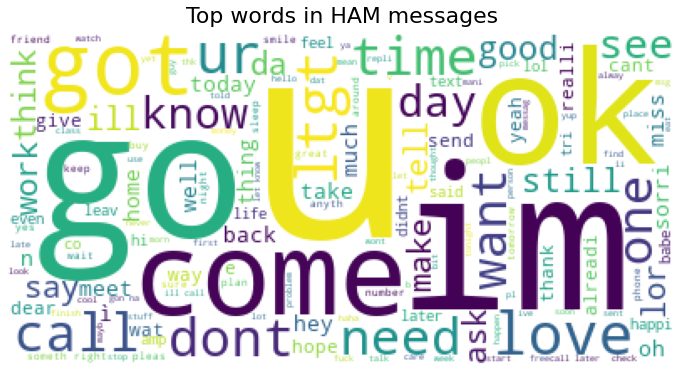

In [34]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', max_words=150)
wc.generate(' '.join(df['stemmed_message'][df['target']=='ham']))
plt.figure(figsize=(12, 8))
plt.title('Top words in HAM messages',fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis('off')
plt.show()

#### Top words in spam messages

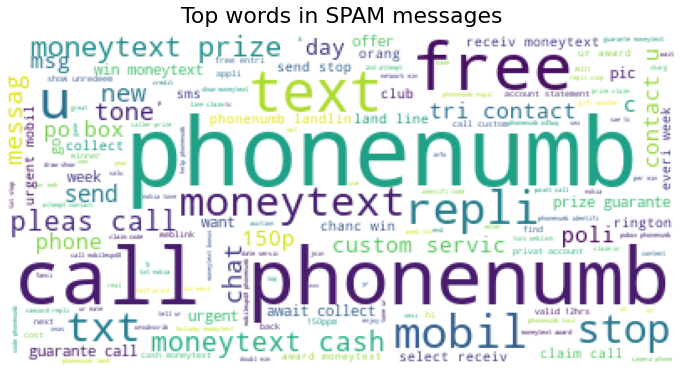

In [35]:
wc = WordCloud(background_color='white', max_words=150)
wc.generate(' '.join(df['stemmed_message'][df['target']=='spam']))
plt.figure(figsize=(12, 8))
plt.title('Top words in SPAM messages',fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis('off')
plt.show()

- As we can notice, phone numbers and money amounts are mostly used in spam messages

### Vectorization

In [36]:
x = df['stemmed_message']
y = df['target_encoded']
print(x.shape, y.shape)

(5572,) (5572,)


#### CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer()
c_vect.fit(x)
x_vect = c_vect.transform(x)
x_vect.shape

(5572, 7545)

#### TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_vect)
X_tfidf = tfidf_transformer.transform(x_vect)

X_tfidf.shape

(5572, 7545)

In [39]:
def vectorize(message_arr):
    message_df = pd.Series(message_arr)
    vector = CountVectorizer(vocabulary=c_vect.vocabulary_)
    vector.fit(message_df)
    message_vect = vector.transform(message_df)
    tfidf_transformer.fit(message_vect)
    message_tfidf = tfidf_transformer.transform(message_vect)
    return message_tfidf

### Splitting data into train and test

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=23)

## Model building

### Multinomial Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

MultinomialNB()

## Model evaluation

In [42]:
y_pred = nb.predict(X_test)
X_test.shape

(1115, 7545)

#### Accuracy

In [43]:
# calculate accuracy of predictions
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9739910313901345

#### Confusion matrix

Confusion matrix:
[[977   2]
 [ 27 109]]


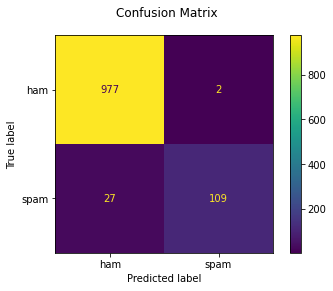

In [44]:
labels = ['ham', 'spam']

disp = metrics.plot_confusion_matrix(nb, X_test, y_test, display_labels=labels)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()